# Early stage diabetes risk prediction

Data Source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn import set_config
from sklearn.model_selection import train_test_split
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                       # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join(path, 'datasets', 'diabetes_data_upload.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
df.shape

(520, 17)

In [6]:
pd.value_counts(df.drop(columns='class').dtypes)

object    15
int64      1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

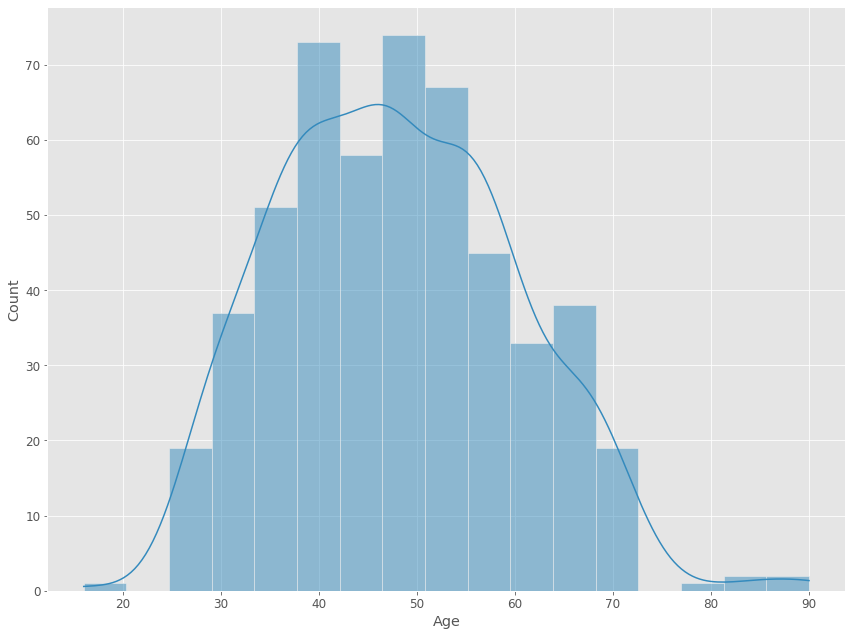

In [8]:
sns.histplot(df['Age'], kde='kde')

Helper Functions

In [9]:
def plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None):

    # create figure and axis
    fig, ax = plt.subplots()
    
    # plot bar charts
    sns.barplot(x=x, y=y, hue=hue, data=data, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar


def plot_pie(df, x, height, shadow=None, startangle=None, title=None):

    # initiate matplot figure
    fig1, ax1 = plt.subplots()

    # plot pie
    ax1.pie(x=height, labels=x, autopct='%1.1f%%', shadow=shadow, startangle=startangle, data=df)

    # label plot
    ax1.set(title=title) 

    return plot_pie

Gender Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

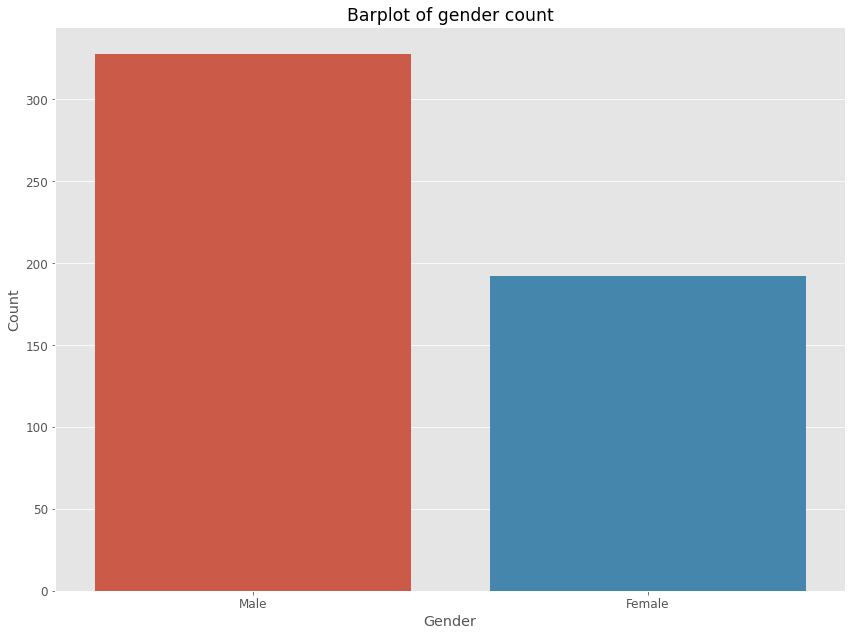

In [10]:
plot_bar(
    x=df['Gender'].value_counts().keys(), y=df['Gender'].value_counts().values, data=df,
    xlabel='Gender', ylabel='Count', title='Barplot of gender count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

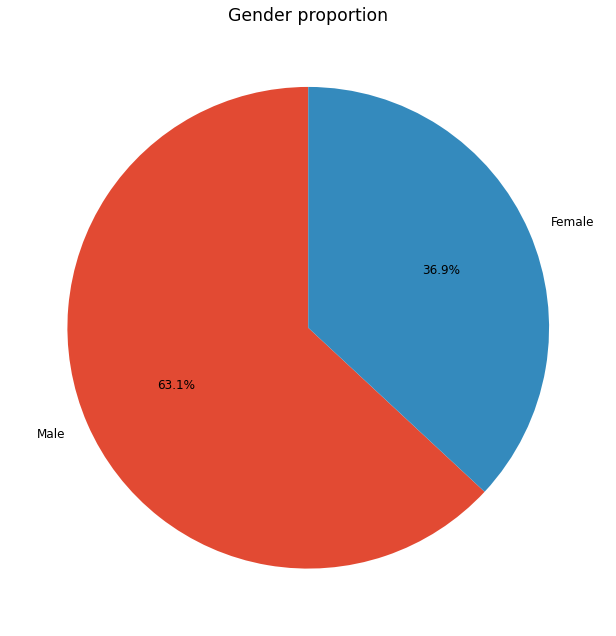

In [11]:
plot_pie(
    df=df, 
    x=df['Gender'].value_counts().keys(), height=df['Gender'].value_counts(normalize=True).values, startangle=90,
    title='Gender proportion'
)

Polyuria Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

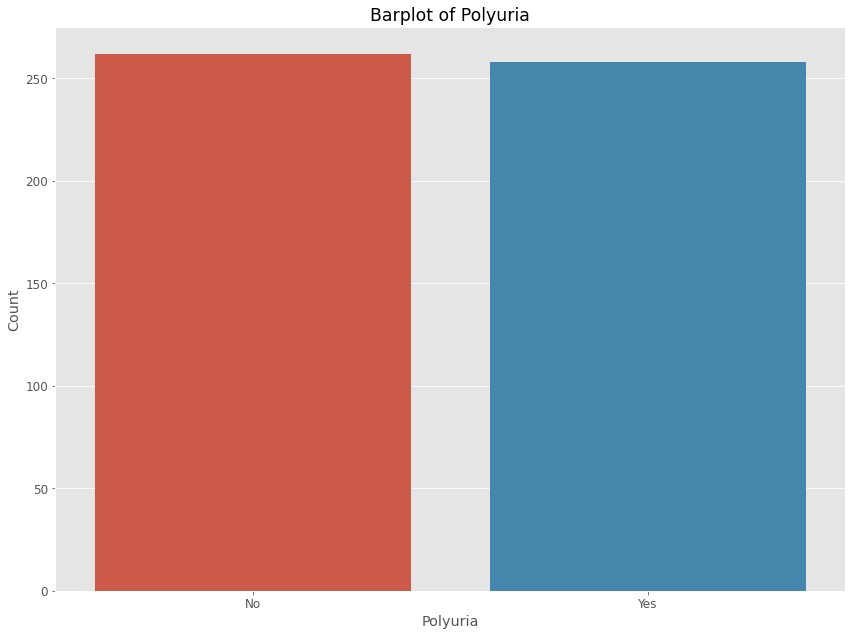

In [12]:
plot_bar(
    x=df['Polyuria'].value_counts().keys(), y=df['Polyuria'].value_counts().values, data=df,
    xlabel='Polyuria', ylabel='Count', title='Barplot of Polyuria'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

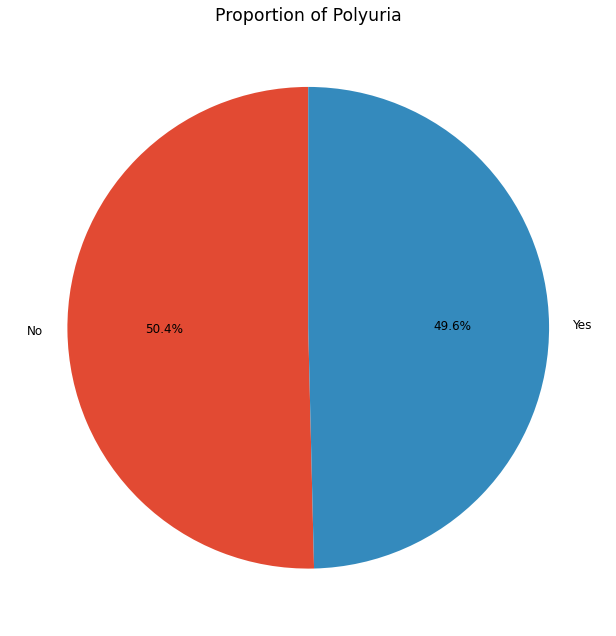

In [13]:
plot_pie(
    df=df, 
    x=df['Polyuria'].value_counts().keys(), height=df['Polyuria'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Polyuria'
)

Polydipsia Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

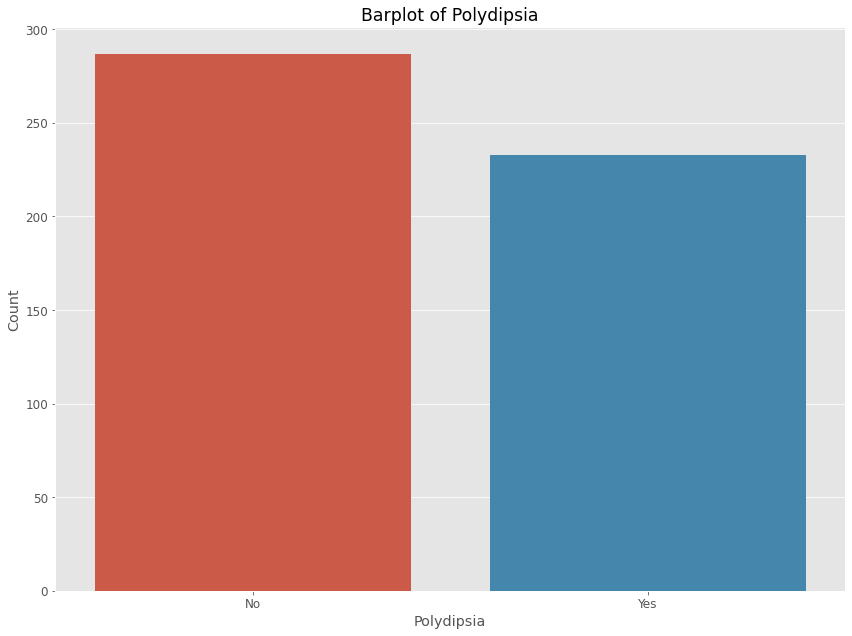

In [14]:
plot_bar(
    x=df['Polydipsia'].value_counts().keys(), y=df['Polydipsia'].value_counts().values, data=df,
    xlabel='Polydipsia', ylabel='Count', title='Barplot of Polydipsia'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

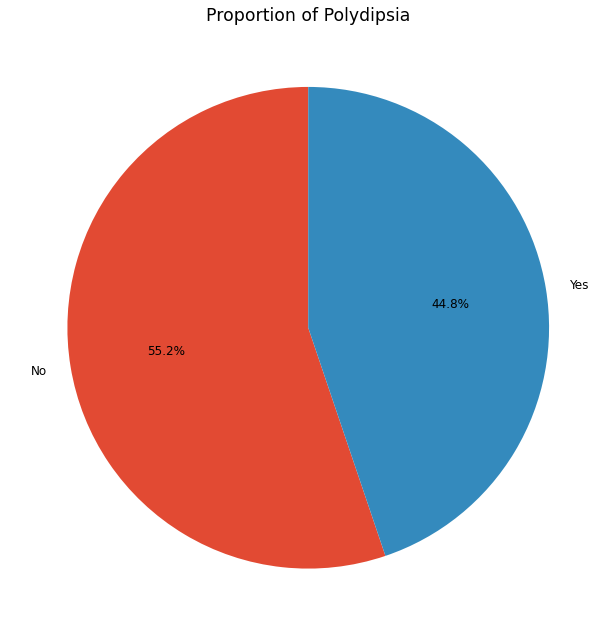

In [15]:
plot_pie(
    df=df, 
    x=df['Polydipsia'].value_counts().keys(), height=df['Polydipsia'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Polydipsia'
)

Sudden Weight Loss Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

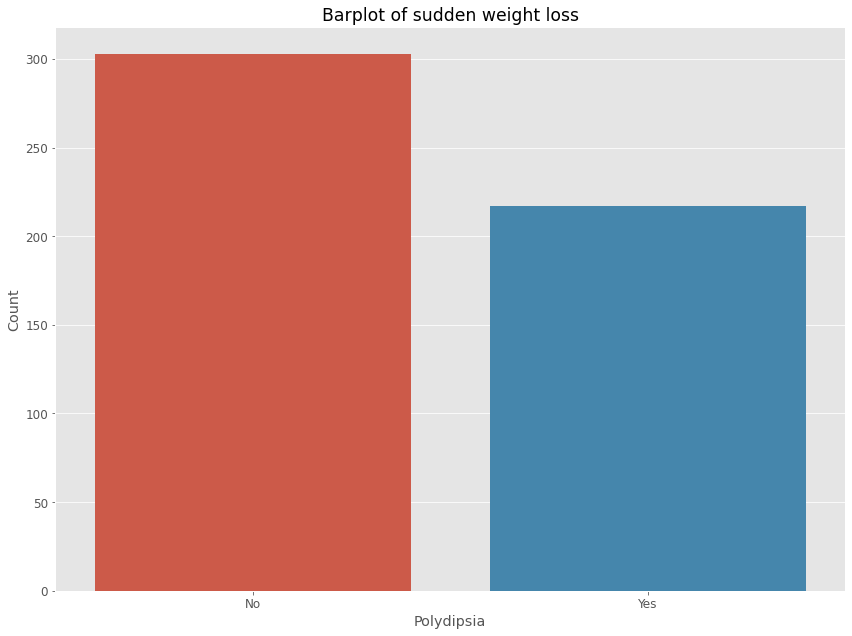

In [16]:
plot_bar(
    x=df['sudden weight loss'].value_counts().keys(), y=df['sudden weight loss'].value_counts().values, data=df,
    xlabel='Polydipsia', ylabel='Count', title='Barplot of sudden weight loss'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

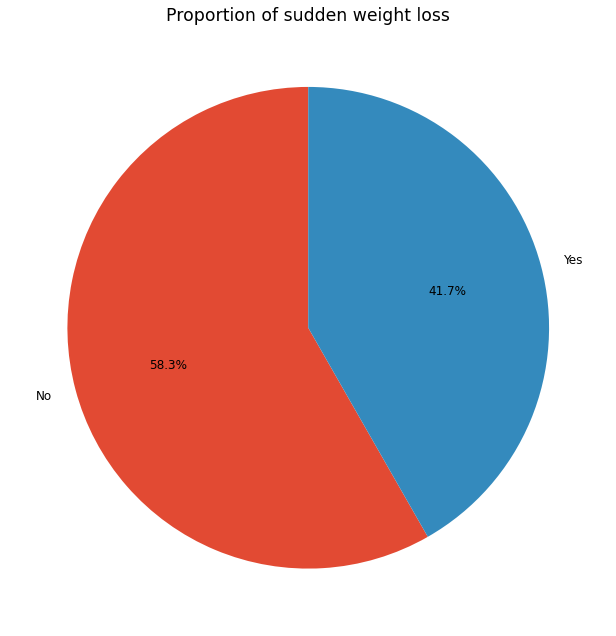

In [17]:
plot_pie(
    df=df, 
    x=df['sudden weight loss'].value_counts().keys(), height=df['sudden weight loss'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of sudden weight loss'
)

Weakness Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

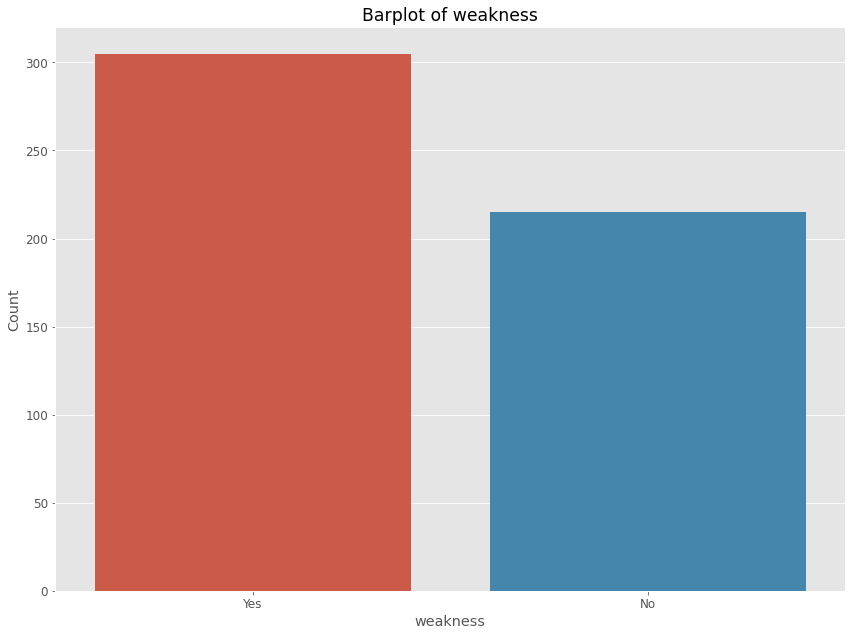

In [18]:
plot_bar(
    x=df['weakness'].value_counts().keys(), y=df['weakness'].value_counts().values, data=df,
    xlabel='weakness', ylabel='Count', title='Barplot of weakness'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

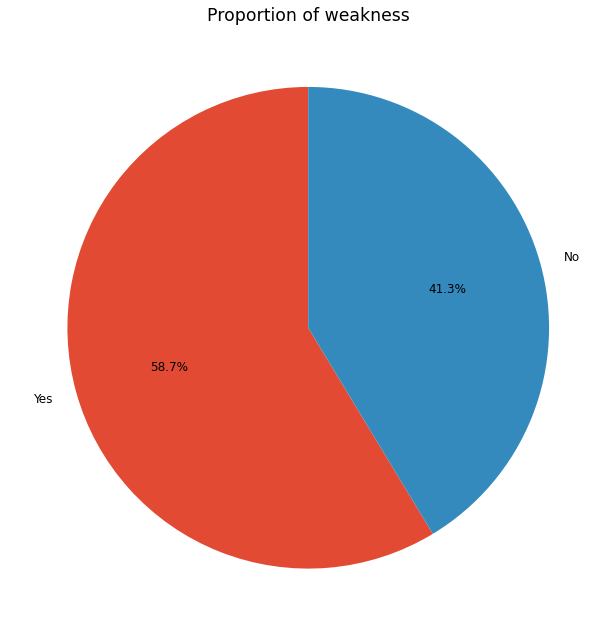

In [19]:
plot_pie(
    df=df, 
    x=df['weakness'].value_counts().keys(), height=df['weakness'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of weakness'
)

Polyphagia Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

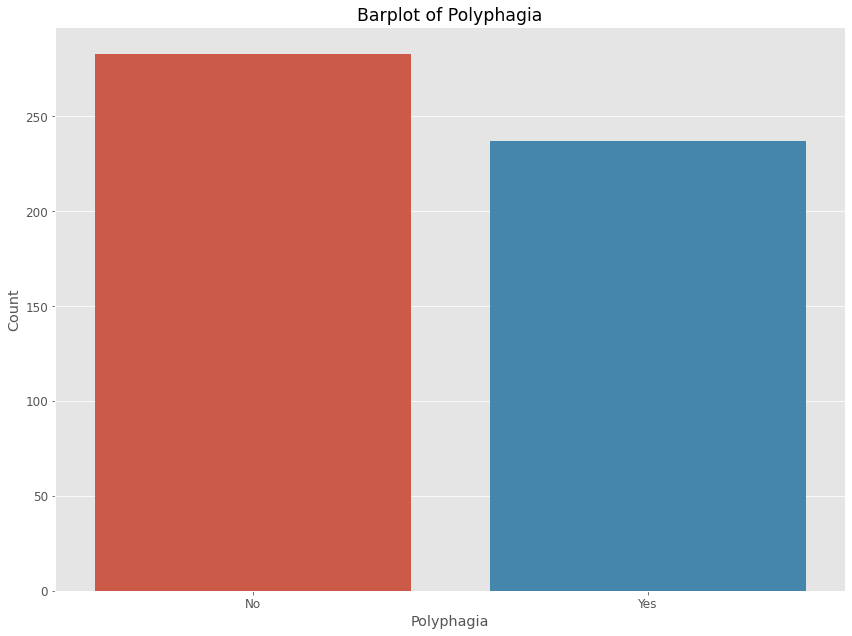

In [20]:
plot_bar(
    x=df['Polyphagia'].value_counts().keys(), y=df['Polyphagia'].value_counts().values, data=df,
    xlabel='Polyphagia', ylabel='Count', title='Barplot of Polyphagia'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

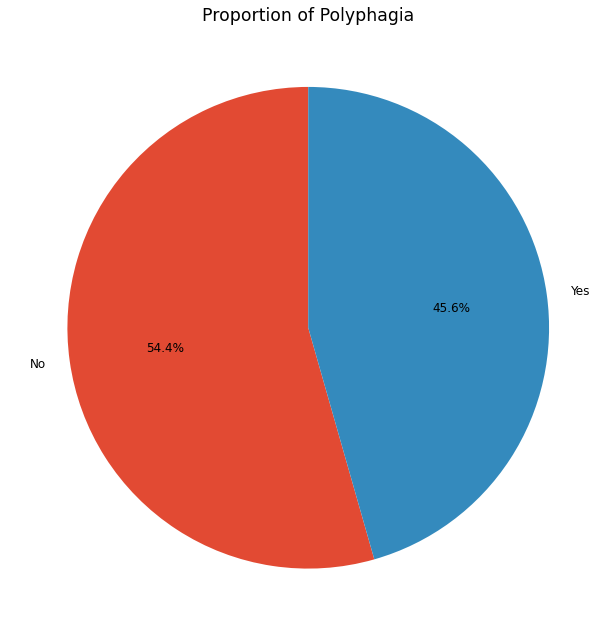

In [21]:
plot_pie(
    df=df, 
    x=df['Polyphagia'].value_counts().keys(), height=df['Polyphagia'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Polyphagia'
)

Genital Thrush Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

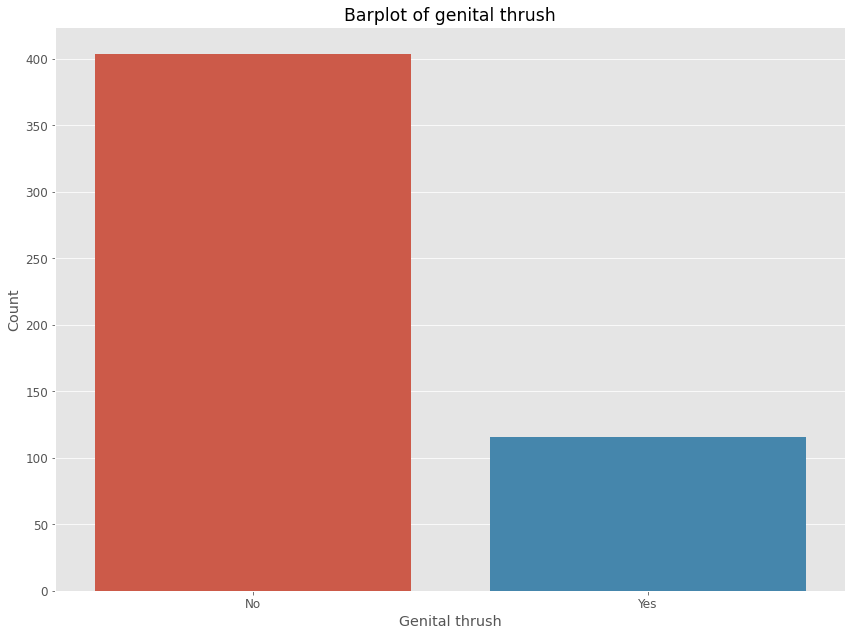

In [22]:
plot_bar(
    x=df['Genital thrush'].value_counts().keys(), y=df['Genital thrush'].value_counts().values, data=df,
    xlabel='Genital thrush', ylabel='Count', title='Barplot of genital thrush'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

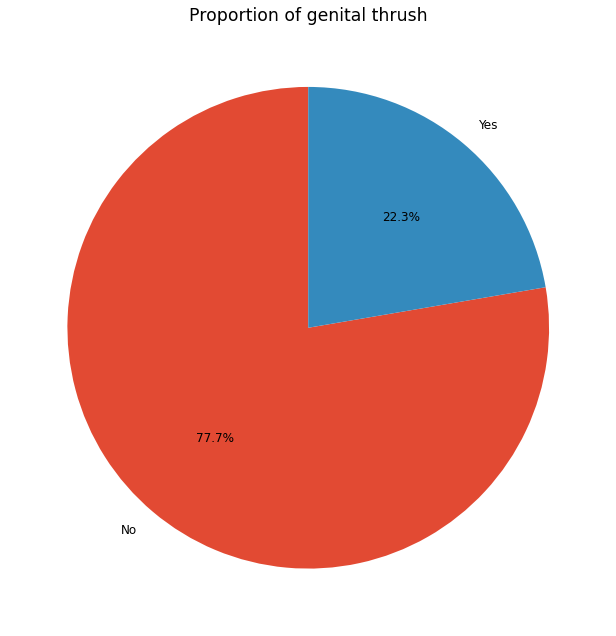

In [23]:
plot_pie(
    df=df, 
    x=df['Genital thrush'].value_counts().keys(), height=df['Genital thrush'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of genital thrush'
)

Visual blurring Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

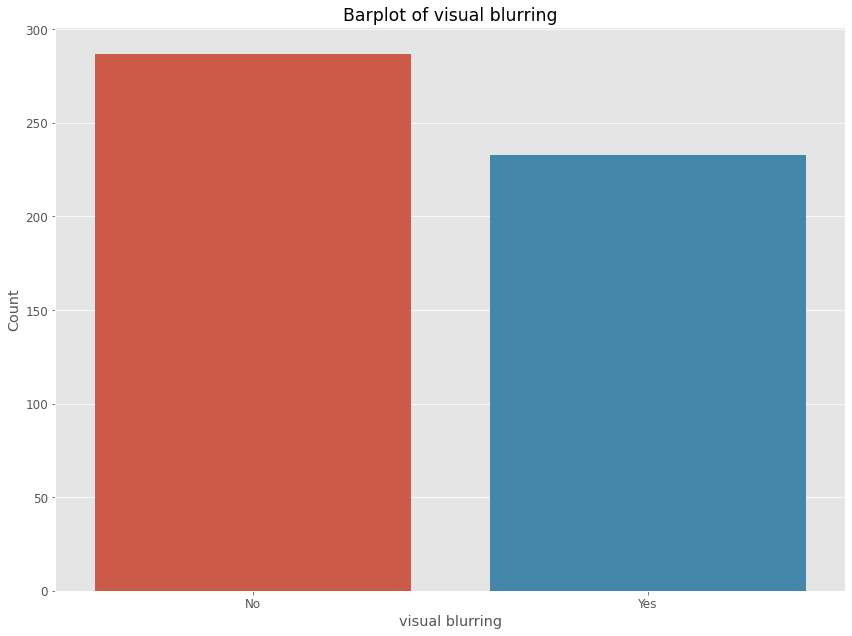

In [24]:
plot_bar(
    x=df['visual blurring'].value_counts().keys(), y=df['visual blurring'].value_counts().values, data=df,
    xlabel='visual blurring', ylabel='Count', title='Barplot of visual blurring'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

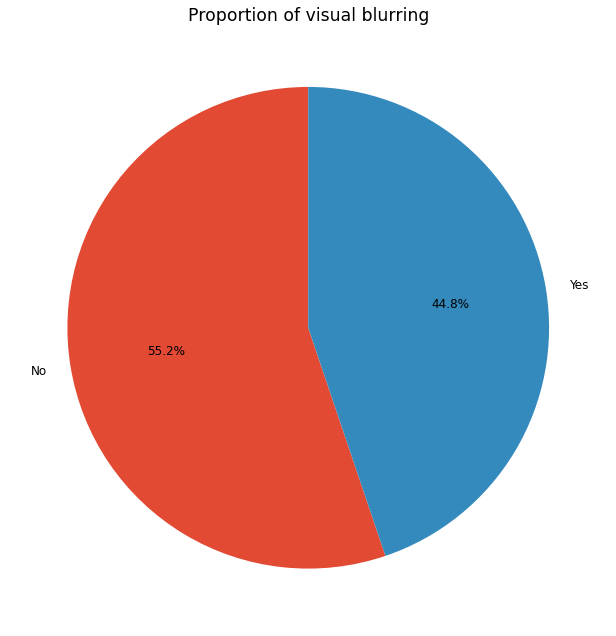

In [25]:
plot_pie(
    df=df, 
    x=df['visual blurring'].value_counts().keys(), height=df['visual blurring'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of visual blurring'
)

Itching Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

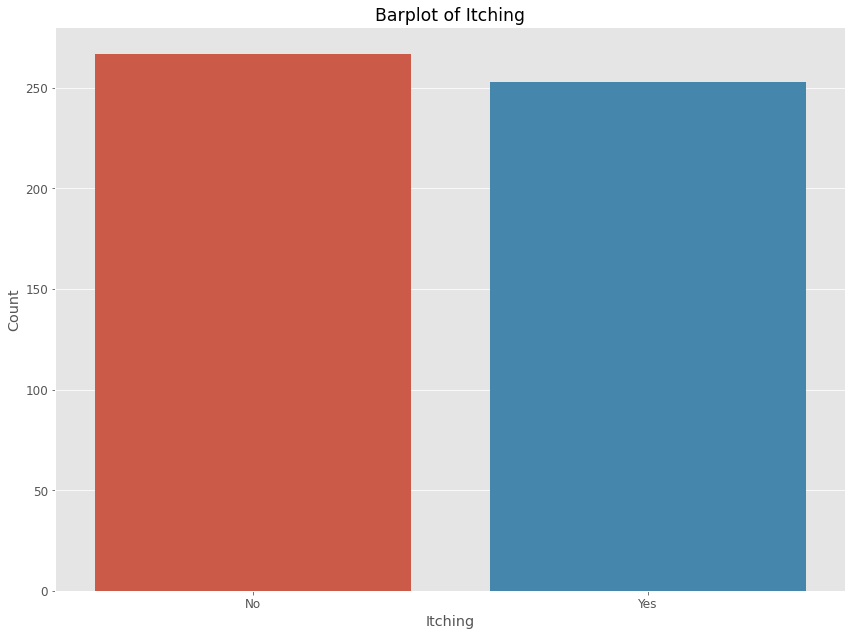

In [26]:
plot_bar(
    x=df['Itching'].value_counts().keys(), y=df['Itching'].value_counts().values, data=df,
    xlabel='Itching', ylabel='Count', title='Barplot of Itching'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

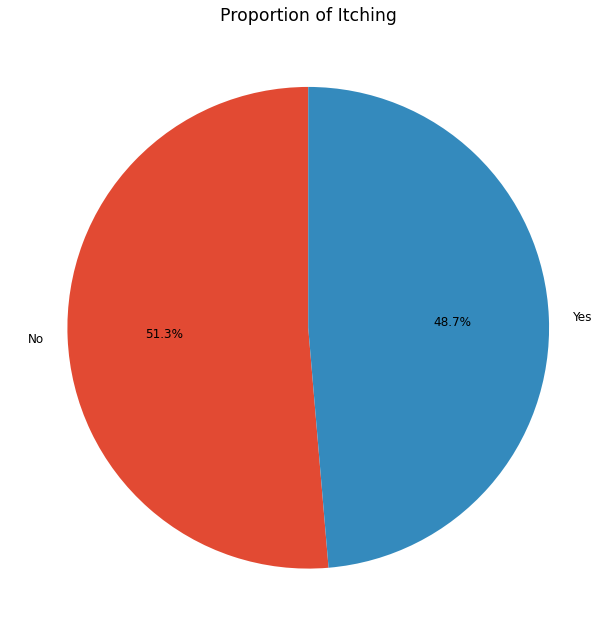

In [27]:
plot_pie(
    df=df, 
    x=df['Itching'].value_counts().keys(), height=df['Itching'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Itching'
)

Irritability Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

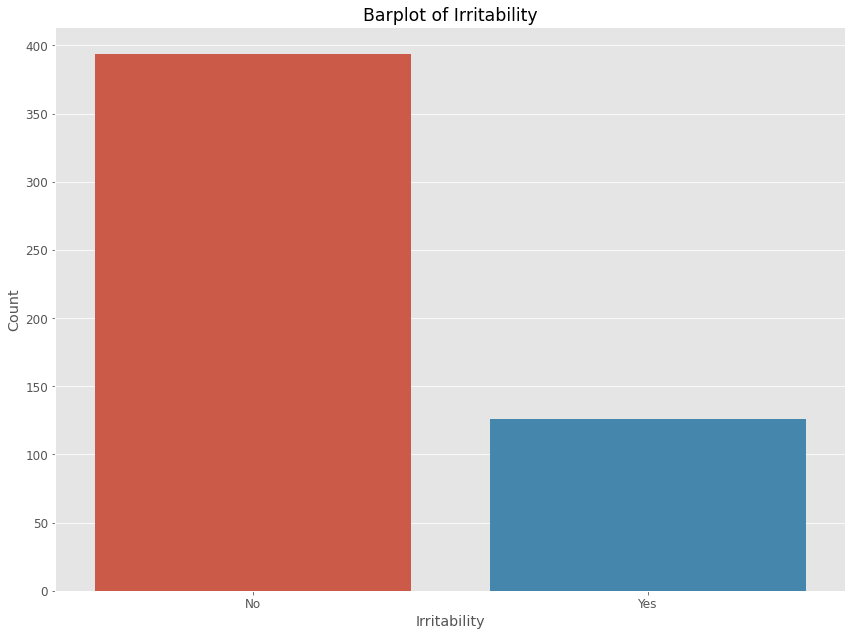

In [28]:
plot_bar(
    x=df['Irritability'].value_counts().keys(), y=df['Irritability'].value_counts().values, data=df,
    xlabel='Irritability', ylabel='Count', title='Barplot of Irritability'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

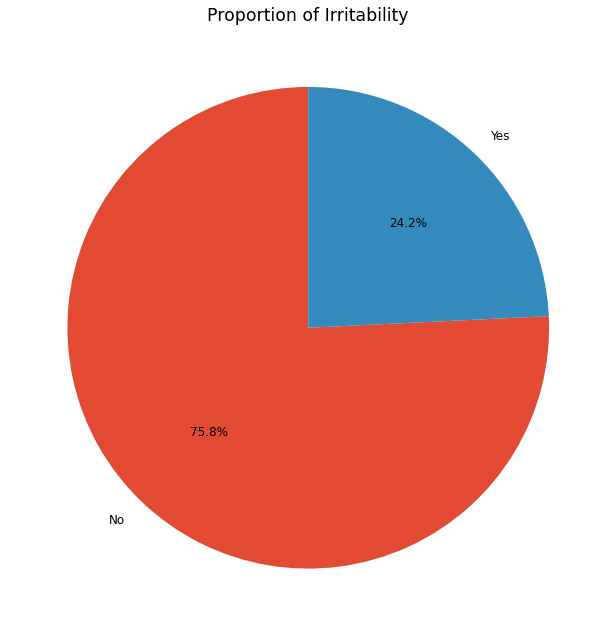

In [29]:
plot_pie(
    df=df, 
    x=df['Irritability'].value_counts().keys(), height=df['Irritability'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Irritability'
)

Delayed healing Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

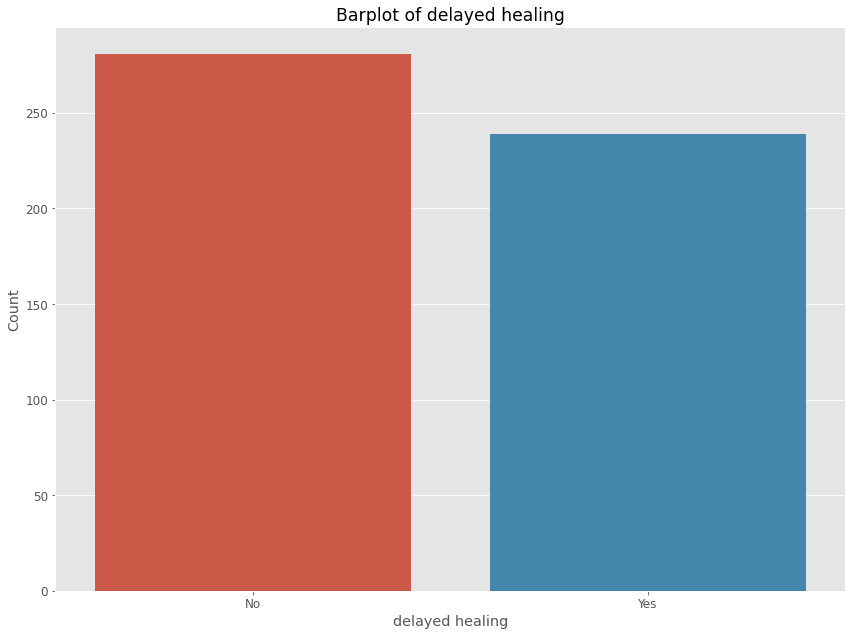

In [30]:
plot_bar(
    x=df['delayed healing'].value_counts().keys(), y=df['delayed healing'].value_counts().values, data=df,
    xlabel='delayed healing', ylabel='Count', title='Barplot of delayed healing'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

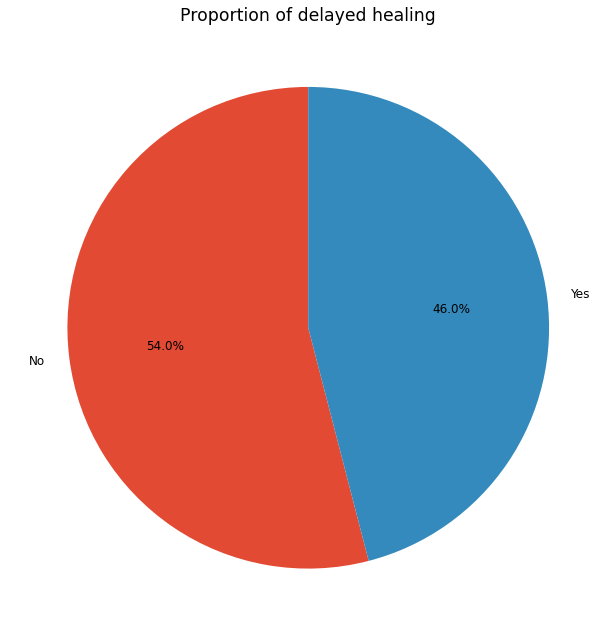

In [31]:
plot_pie(
    df=df, 
    x=df['delayed healing'].value_counts().keys(), height=df['delayed healing'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of delayed healing'
)

Partial paresis Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

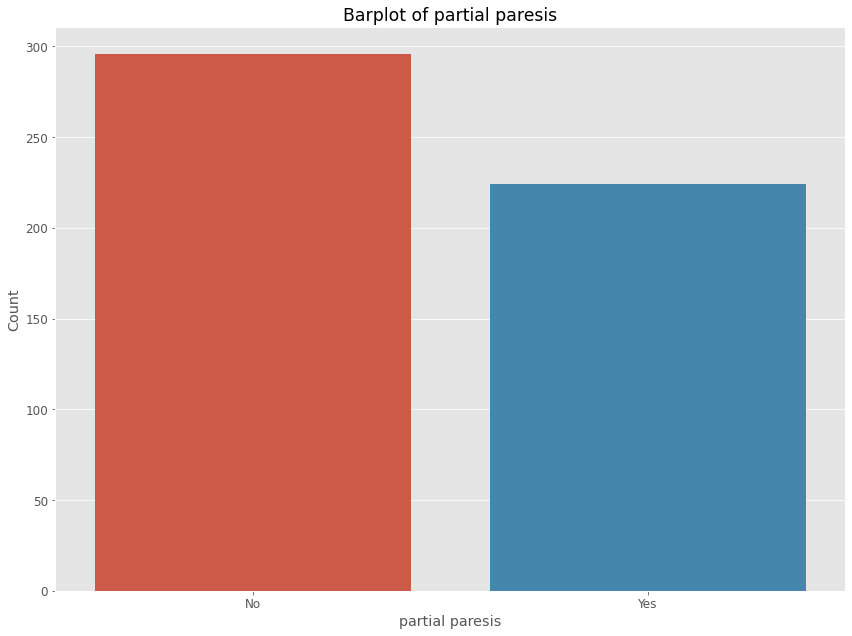

In [32]:
plot_bar(
    x=df['partial paresis'].value_counts().keys(), y=df['partial paresis'].value_counts().values, data=df,
    xlabel='partial paresis', ylabel='Count', title='Barplot of partial paresis'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

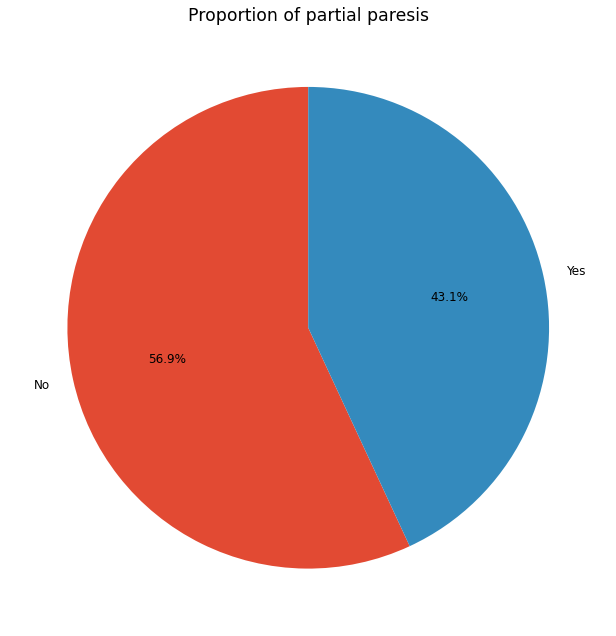

In [33]:
plot_pie(
    df=df, 
    x=df['partial paresis'].value_counts().keys(), height=df['partial paresis'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of partial paresis'
)

Muscle stiffness Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

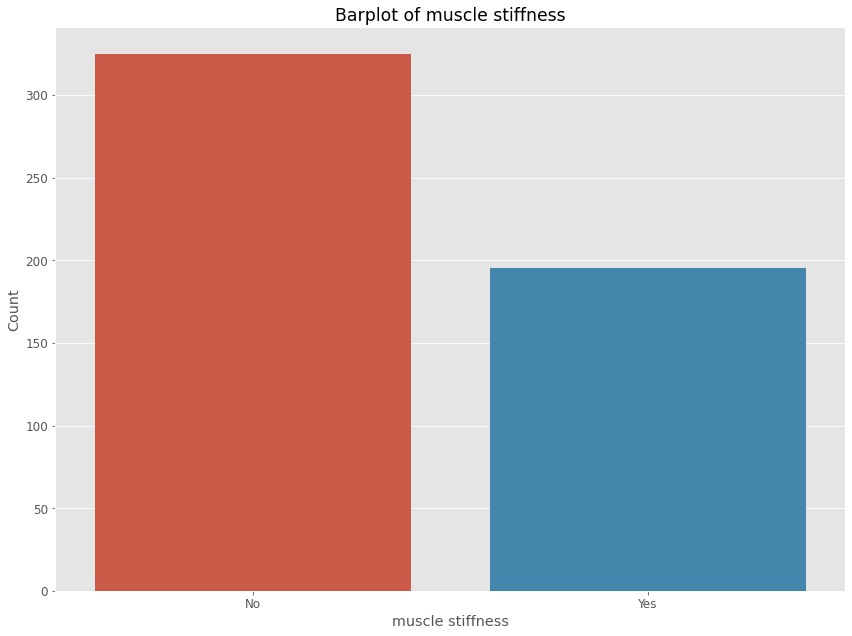

In [34]:
plot_bar(
    x=df['muscle stiffness'].value_counts().keys(), y=df['muscle stiffness'].value_counts().values, data=df,
    xlabel='muscle stiffness', ylabel='Count', title='Barplot of muscle stiffness'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

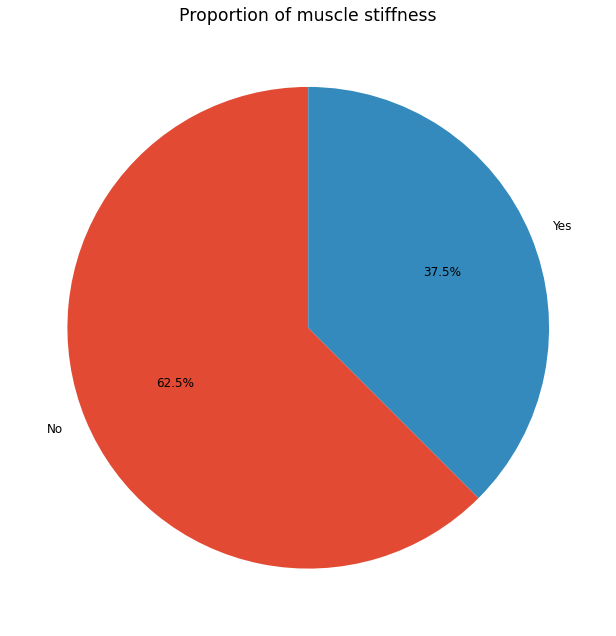

In [35]:
plot_pie(
    df=df, 
    x=df['muscle stiffness'].value_counts().keys(), height=df['muscle stiffness'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of muscle stiffness'
)

Alopecia Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

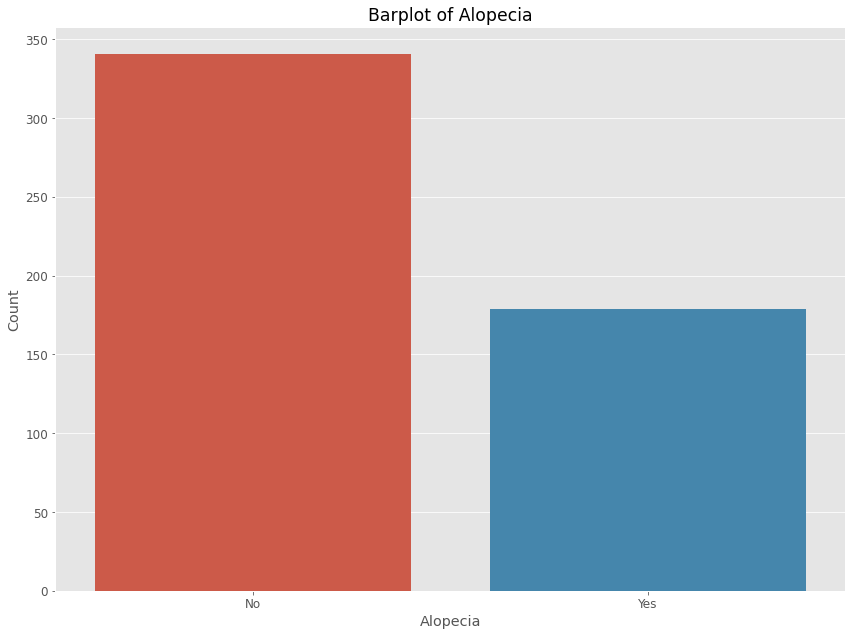

In [36]:
plot_bar(
    x=df['Alopecia'].value_counts().keys(), y=df['Alopecia'].value_counts().values, data=df,
    xlabel='Alopecia', ylabel='Count', title='Barplot of Alopecia'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

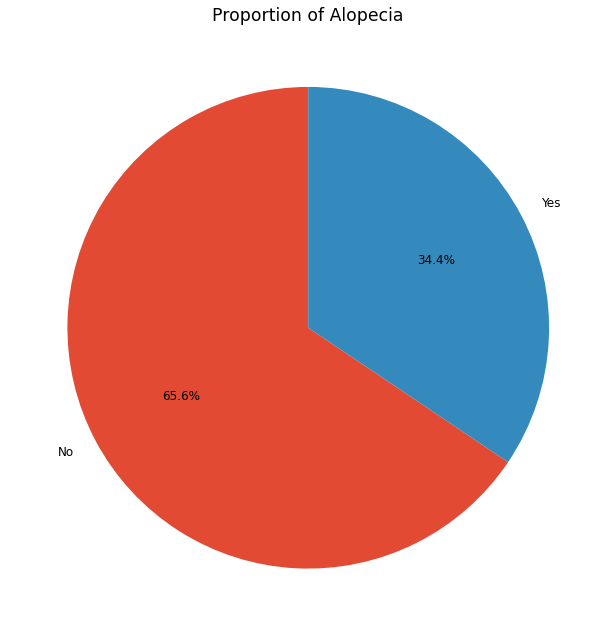

In [37]:
plot_pie(
    df=df, 
    x=df['Alopecia'].value_counts().keys(), height=df['Alopecia'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Alopecia'
)

Obesity Exploration

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

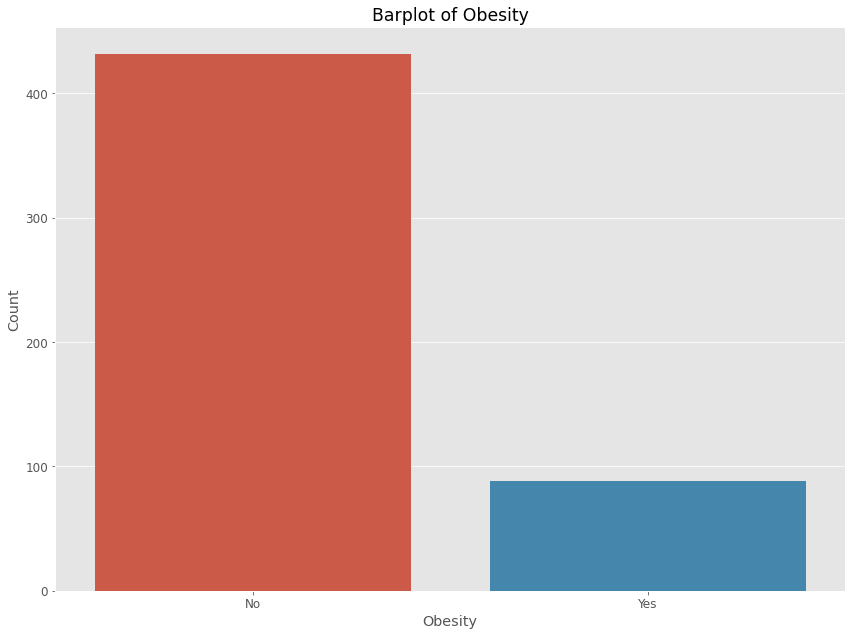

In [38]:
plot_bar(
    x=df['Obesity'].value_counts().keys(), y=df['Obesity'].value_counts().values, data=df,
    xlabel='Obesity', ylabel='Count', title='Barplot of Obesity'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

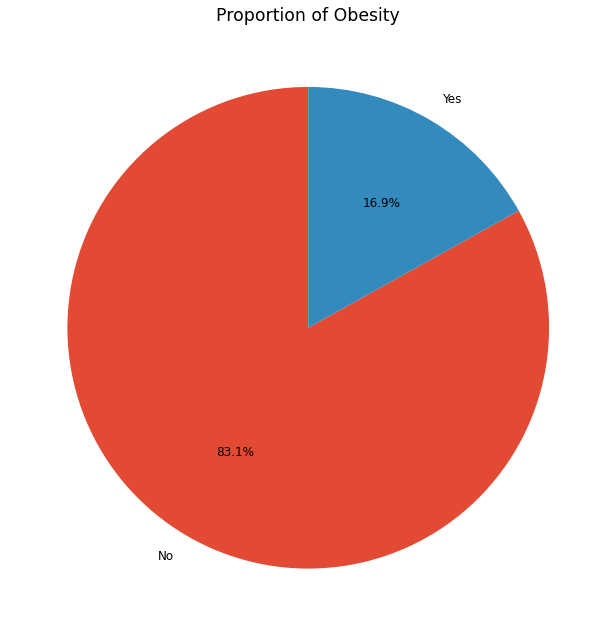

In [39]:
plot_pie(
    df=df, 
    x=df['Obesity'].value_counts().keys(), height=df['Obesity'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Obesity'
)

Age categories, 0-24 => 1, 25-34 => 2, 35-44 => 3, 45-54 => 4, 55-64 => 5, 65 and over => 6

In [40]:
df['AgeCat'] = pd.cut(df['Age'], [0, 24, 34, 44, 54, 64, np.inf], labels=[1, 2, 3, 4, 5, 6])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,AgeCat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,3
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,5
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,3
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,4
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,5


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

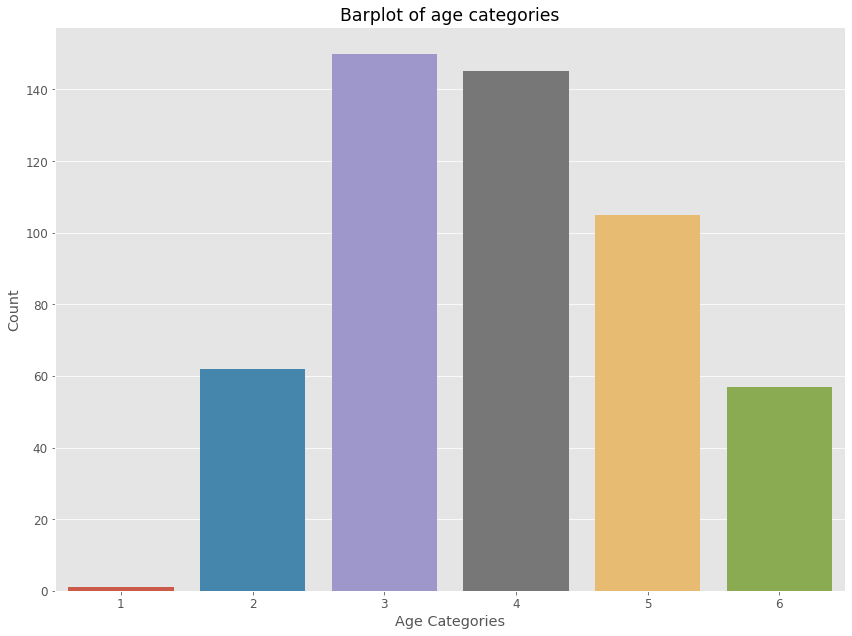

In [41]:
plot_bar(
    x=df['AgeCat'].value_counts().keys(), y=df['AgeCat'].value_counts().values, data=df, 
    xlabel='Age Categories', ylabel='Count', title='Barplot of age categories'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

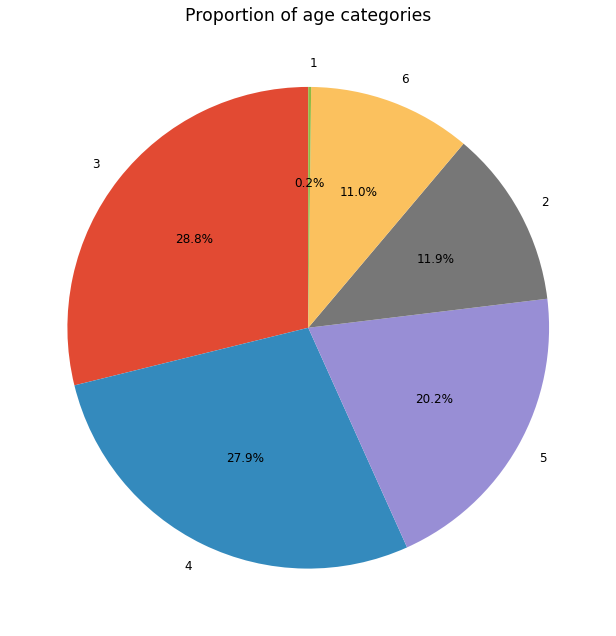

In [42]:
plot_pie(
    df=df,
    x=df['AgeCat'].value_counts().keys(), height=df['AgeCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of age categories'
)

# Missing Values Exploration

In [43]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
AgeCat                0
dtype: int64

# Data Splitting

In [44]:
# set random seed
rnd_state = 42

# select feature columns
feature_cols = df.drop(columns=['class']).columns

# select target column
target_col = 'class'

X, y = df[feature_cols], df[target_col]

<AxesSubplot:>

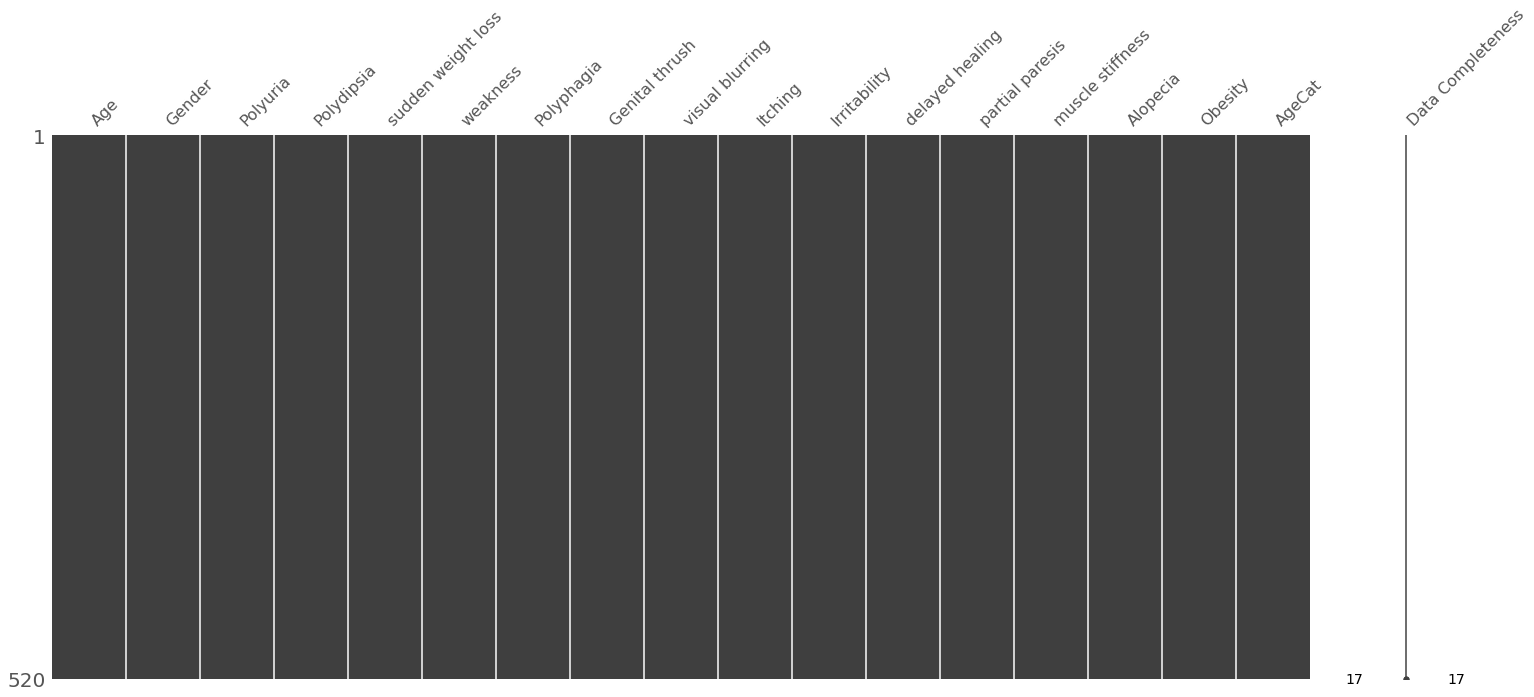

In [45]:
# missing value exploration in feature dataframe
msno.matrix(X, labels=True, sort='descending')                                  # no missing values evident

In [46]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd_state)

In [47]:
print('Features dimension: {0}; Target dimension: {1}'.format(X.shape, y.shape))
print('X train dimension: {0}; y dimension: {1}'.format(X_train.shape, y_train.shape))
print('X test dimension: {0}; y test dimension: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (520, 17); Target dimension: (520,)
X train dimension: (416, 17); y dimension: (416,)
X test dimension: (104, 17); y test dimension: (104,)


# Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, QuantileTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [49]:
# select numeric and non-numeric columns
num_cols = X.select_dtypes(include=np.number).columns
non_num = X.select_dtypes(exclude=np.number).columns

# create transformers for numeric and non-numeric columns
num_trans = Pipeline(
    steps=[
        ('qt', QuantileTransformer(random_state=rnd_state))  
    ]
)

non_num_trans = Pipeline(
    steps=[
        ('ordenc', OrdinalEncoder())
    ]
)

# apply transformer to numeric and non-numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_trans, num_cols),
        ('non_numeric', non_num_trans, non_num)
    ]
)

Linear Support Vector Classifier

In [50]:
# Append classifier to preprocessing pipeline to have a full prediction pipeline.
lsvc_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('lsvc', LinearSVC(random_state=rnd_state))
    ]
)

lsvc_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('lsvc', LinearSVC(random_state=42))])

In [51]:
print("Coefficient: {0} \n\n Intercept: {1}".format(lsvc_pipe.named_steps['lsvc'].coef_, lsvc_pipe.named_steps['lsvc'].intercept_))

Coefficient: [[-1.17601863 -1.07527967  1.09280996  1.21193989  0.32457267  0.28662604
   0.16074383  0.59567828  0.38895454 -0.66774996  0.62617051 -0.2550745
   0.38671768 -0.09572373  0.01122273 -0.12118688  0.11975619]] 

 Intercept: [0.1199362]


In [52]:
# helper function to display model test score
def display_test_score(classifier):
    return 'Model test score: {:.2%}'.format(classifier.score(X_test, y_test))

Linear SVC Test Score

In [53]:
display_test_score(lsvc_pipe)

'Model test score: 92.31%'

KNeighbors Classifier

In [54]:
knn_clf_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('knn_clf', KNeighborsClassifier())
    ]
)

knn_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('knn_clf', KNeighborsClassifier())])

KNN Classifier Test Score

In [55]:
display_test_score(knn_clf_pipe)

'Model test score: 90.38%'

Support Vector Classifier

In [56]:
svc_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('svc', SVC(random_state=rnd_state))
    ]
)

svc_pipe.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('svc', SVC(random_state=42))])

SVC Test Score

In [57]:
display_test_score(svc_pipe)

'Model test score: 96.15%'

Random Forest Classifier

In [58]:
rfc_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('rf_clf', RandomForestClassifier(random_state=rnd_state))
    ]
)

rfc_pipe.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('rf_clf', RandomForestClassifier(random_state=42))])

Random Forest Test Score

In [59]:
display_test_score(rfc_pipe)                                  # model overfitting

'Model test score: 100.00%'

Extra Trees Classifier

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

etc_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('etc', ExtraTreesClassifier(random_state=rnd_state))
    ]
)

etc_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('etc', ExtraTreesClassifier(random_state=42))])

Extra Trees Classifier Test Score

In [61]:
display_test_score(etc_pipe)

'Model test score: 99.04%'

# Save Final Model

In [62]:
import joblib

# final model
final_model = etc_pipe.fit(X_test, y_test)

joblib.dump(final_model, 'diabetes_prediction_model.pkl')

['diabetes_prediction_model.pkl']